In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import os
os.chdir("/Users/Raul/Desktop")

In [2]:
col_names = ["pregnant", "glucose", "bp", "skin", "insulin", "bmi", "pedigree", "age", "label"]
pima = pd.read_csv("diabetes.csv", header=None, names = col_names)
df = pima.iloc[1:,:]
df

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
764,10,101,76,48,180,32.9,0.171,63,0
765,2,122,70,27,0,36.8,0.34,27,0
766,5,121,72,23,112,26.2,0.245,30,0
767,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# Selección de características
feature_cols = ['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree']
X = df[feature_cols]
y = df.label 

In [4]:
y

1      1
2      0
3      1
4      0
5      1
      ..
764    0
765    0
766    0
767    1
768    0
Name: label, Length: 768, dtype: object

In [111]:
# Create training and testing samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Solvers disponibles: ‘sag’, ‘newton-cg’, ‘liblinear’, 'saga', ‘lbfgs’. default=’lbfgs’

###  Mayor referencia en: https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-definitions

In [122]:
# sag: Stochastic Average Gradient
# newton-cg: Método de Newton 
# liblinear: Library for large linear classification (Algoritmo Coordinate Descent)
# saga: Variante del método sag
# lbfgs:  Limited-memory Broyden–Fletcher–Goldfarb–Shanno Algorithm, 

In [121]:
# SOLUCIONADOR: sag
model = LogisticRegression(solver='sag')
clf = model.fit(X_train, y_train)

In [32]:
# Predict class labels on a test data
y_pred = model.predict(X_test)

# Print slope and intercept
print('Intercept (Beta 0): ', clf.intercept_)
print('Slope (Beta 1): ', clf.coef_)

Intercept (Beta 0):  [-0.01187147]
Slope (Beta 1):  [[ 0.05204285  0.00116492 -0.00939227 -0.00231369  0.01407853 -0.03084231
   0.00112095]]


In [33]:
# Use score method to get accuracy of model
score = model.score(X_test, y_test)
print('Accuracy Score: ', score)
print('--------------------------------------------------------')
# Look at classification report to evaluate the model
print(classification_report(y_test, y_pred))

Accuracy Score:  0.6428571428571429
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.67      0.89      0.76        99
           1       0.50      0.20      0.29        55

    accuracy                           0.64       154
   macro avg       0.58      0.54      0.52       154
weighted avg       0.61      0.64      0.59       154



In [34]:
# SOLUCIONADOR: newton-cg
model = LogisticRegression(solver='newton-cg')
clf = model.fit(X_train, y_train)

# Predict class labels on a test data
y_pred = model.predict(X_test)

# Print slope and intercept
print('Intercept (Beta 0): ', clf.intercept_)
print('Slope (Beta 1): ', clf.coef_)

# Use score method to get accuracy of model
score = model.score(X_test, y_test)
print('Accuracy Score: ', score)
print('--------------------------------------------------------')
# Look at classification report to evaluate the model
print(classification_report(y_test, y_pred))

Intercept (Beta 0):  [-8.10390156]
Slope (Beta 1):  [[ 0.12718791 -0.00096255  0.08559354  0.01168397  0.03656972 -0.01508705
   0.63366334]]
Accuracy Score:  0.7727272727272727
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.90      0.84        99
           1       0.75      0.55      0.63        55

    accuracy                           0.77       154
   macro avg       0.77      0.72      0.73       154
weighted avg       0.77      0.77      0.76       154



In [35]:
# SOLUCIONADOR: liblinear
model = LogisticRegression(solver='liblinear')
clf = model.fit(X_train, y_train)

# Predict class labels on a test data
y_pred = model.predict(X_test)

# Print slope and intercept
print('Intercept (Beta 0): ', clf.intercept_)
print('Slope (Beta 1): ', clf.coef_)

# Use score method to get accuracy of model
score = model.score(X_test, y_test)
print('Accuracy Score: ', score)
print('--------------------------------------------------------')
# Look at classification report to evaluate the model
print(classification_report(y_test, y_pred))

Intercept (Beta 0):  [-5.3789679]
Slope (Beta 1):  [[ 1.18839257e-01 -3.16887240e-04  5.28139709e-02  3.80223853e-03
   2.87897610e-02 -1.91009580e-02  4.74700127e-01]]
Accuracy Score:  0.7662337662337663
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.90      0.83        99
           1       0.74      0.53      0.62        55

    accuracy                           0.77       154
   macro avg       0.76      0.71      0.72       154
weighted avg       0.76      0.77      0.76       154



In [36]:
# Solvers disponibles: {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’
# SOLUCIONADOR: saga
model = LogisticRegression(solver='saga')
clf = model.fit(X_train, y_train)

# Predict class labels on a test data
y_pred = model.predict(X_test)

# Print slope and intercept
print('Intercept (Beta 0): ', clf.intercept_)
print('Slope (Beta 1): ', clf.coef_)

# Use score method to get accuracy of model
score = model.score(X_test, y_test)
print('Accuracy Score: ', score)
print('--------------------------------------------------------')
# Look at classification report to evaluate the model
print(classification_report(y_test, y_pred))

Intercept (Beta 0):  [-0.00610761]
Slope (Beta 1):  [[ 0.02990897  0.00115487 -0.00947685  0.00099771  0.01388419 -0.03083846
   0.00047626]]
Accuracy Score:  0.6493506493506493
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.67      0.89      0.77        99
           1       0.52      0.22      0.31        55

    accuracy                           0.65       154
   macro avg       0.60      0.55      0.54       154
weighted avg       0.62      0.65      0.60       154



In [112]:
# SOLUCIONADOR: lbfgs
model = LogisticRegression(solver='lbfgs')
clf = model.fit(X_train, y_train)

# Predict class labels on a test data
y_pred = model.predict(X_test)

# Print slope and intercept
print('Intercept (Beta 0): ', clf.intercept_)
print('Slope (Beta 1): ', clf.coef_)

# Use score method to get accuracy of model
score = model.score(X_test, y_test)
print('Accuracy Score: ', score)
print('--------------------------------------------------------')
# Look at classification report to evaluate the model
print(classification_report(y_test, y_pred))

Intercept (Beta 0):  [-8.09707746]
Slope (Beta 1):  [[ 0.12707249 -0.00096077  0.08549919  0.0116877   0.03655047 -0.01509716
   0.63316016]]
Accuracy Score:  0.7727272727272727
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.90      0.84        99
           1       0.75      0.55      0.63        55

    accuracy                           0.77       154
   macro avg       0.77      0.72      0.73       154
weighted avg       0.77      0.77      0.76       154



In [113]:
# Predicción de probabilidades para casos particulares
y_pred_probs = clf.predict_proba(X_test)[:,1]
y_pred_probs[0:5]

array([0.4366193 , 0.31979373, 0.15802561, 0.04345572, 0.1997421 ])

In [114]:
y_test[0:5]

286    0
102    0
582    0
353    0
727    0
Name: label, dtype: object

In [115]:
y_test = y_test.to_numpy()
y_test[0:5]

array(['0', '0', '0', '0', '0'], dtype=object)

In [116]:
y_test = [int(numeric_string) for numeric_string in y_test]
y_test[0:5]

[0, 0, 0, 0, 0]

In [117]:
y_pred_probs = np.round(y_pred_probs, 0)
y_pred_probs[0:5]

array([0., 0., 0., 0., 0.])

Text(0.5, 1.0, 'Curva ROC para Regresión logística')

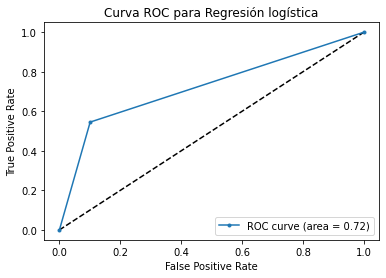

In [118]:
# Graficación de la curva ROC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# fpr = false positive rate
# tpr = true positive rate
# thresholds = límites para valores de p
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
auc = roc_auc_score(y_test, y_pred_probs)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, marker='.', label= 'ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.title("Curva ROC para Regresión logística")